In [6]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as datetime
#抓取股票資料
start = datetime.datetime(2020,5,1)
df_2330 = pdr.DataReader('2330.TW', 'yahoo', start=start)
df_2454 = pdr.DataReader('2454.TW', 'yahoo', start=start)
df_2603 = pdr.DataReader('2603.TW', 'yahoo', start=start)
df_2379 = pdr.DataReader('2379.TW', 'yahoo', start=start)
#日收益率平均
df_total.pct_change().mean()


2330    0.002890
2454    0.003844
2603    0.009305
2379    0.003172
dtype: float64

In [4]:
#結合四個股票
df_total = pd.concat([df_2330['Adj Close'],df_2454['Adj Close'],df_2603['Adj Close'],df_2379['Adj Close']], axis=1)
df_total.columns=['2330', '2454', '2603', '2379']
df_total.head()

,2330,2454,2603,2379
Date,,,,
2020-05-04,288.458801,392.328918,10.75,235.022278
2020-05-05,288.947723,394.292999,10.65,235.022278
2020-05-06,289.436615,400.676331,10.55,236.479019
2020-05-07,290.903320,403.622467,10.60,242.306030
2020-05-08,290.903320,404.113495,10.55,243.277191


In [7]:
#日收益率相關分析
df_total.pct_change().corr()

,2330,2454,2603,2379
2330,1.000000,0.462643,0.075574,0.475021
2454,0.462643,1.000000,0.050993,0.522608
2603,0.075574,0.050993,1.000000,0.071349
2379,0.475021,0.522608,0.071349,1.000000


In [10]:
#對數收益率
log_ret = np.log(df_total/df_total.shift(1))
#股票投資比重
weight = np.array([0.3, 0.2, 0.25, 0.25])
print('股票投資比重:', weight)
#平均日收益率
exp_ret = np.sum((log_ret.mean() * weight )* 252)
print('投資組合的預期報酬:', exp_ret)
#波動性
exp_vol = np.sqrt(np.dot(weight.T, np.dot(log_ret.cov()*252, weight)))
print('預期波動性:',exp_vol)
#夏普指數
SR = exp_ret/exp_vol
print('夏普指數:', SR)

股票投資比重: [0.3  0.2  0.25 0.25]
投資組合的預期報酬: 1.0905260346039403
預期波動性: 0.284008678608655
夏普指數: 3.8397630662076083


In [12]:
#算術平均收益率
df_total.pct_change().head()

,2330,2454,2603,2379
Date,,,,
2020-05-04,NaN,NaN,NaN,NaN
2020-05-05,0.001695,0.005006,-0.009302,0.000000
2020-05-06,0.001692,0.016189,-0.009390,0.006198
2020-05-07,0.005067,0.007353,0.004739,0.024641
2020-05-08,0.000000,0.001217,-0.004717,0.004008


In [13]:
#對數收益率
log_ret = np.log(df_total/df_total.shift(1))
log_ret.head()

,2330,2454,2603,2379
Date,,,,
2020-05-04,NaN,NaN,NaN,NaN
2020-05-05,0.001694,0.004994,-0.009346,0.000000
2020-05-06,0.001691,0.016060,-0.009434,0.006179
2020-05-07,0.005055,0.007326,0.004728,0.024342
2020-05-08,0.000000,0.001216,-0.004728,0.004000


array([[<AxesSubplot:title={'center':'2330'}>,
        <AxesSubplot:title={'center':'2454'}>],
       [<AxesSubplot:title={'center':'2603'}>,
        <AxesSubplot:title={'center':'2379'}>]], dtype=object)

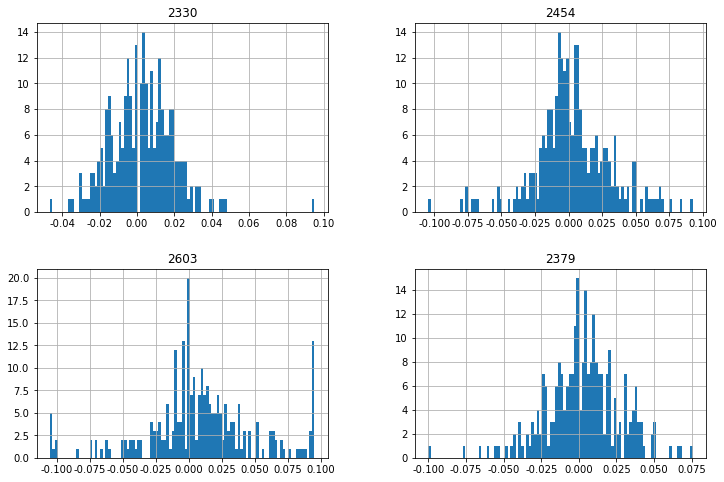

In [14]:
#對數收益率的直方圖
plt.rcParams['axes.unicode_minus']=False
log_ret.hist(bins=100, figsize=(12, 8))